<a href="https://colab.research.google.com/github/likhith-t-25/human-activity-recognition/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please upload your sensor data CSV file


Saving sample_har_gyroscope (1).csv to sample_har_gyroscope (1).csv

✅ File 'sample_har_gyroscope (1).csv' uploaded and loaded successfully!
📐 Shape of dataset: (100, 4)


<ipython-input-1-912ba3a8071a>:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-1-912ba3a8071a>:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 


🎯 Accuracy: 40.00%

📋 Classification Report:
              precision    recall  f1-score   support

     Running       0.00      0.00      0.00         4
     Sitting       0.33      0.40      0.36         5
    Standing       0.75      0.60      0.67         5
     Walking       0.30      0.50      0.38         6

    accuracy                           0.40        20
   macro avg       0.35      0.38      0.35        20
weighted avg       0.36      0.40      0.37        20



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/IPython/c

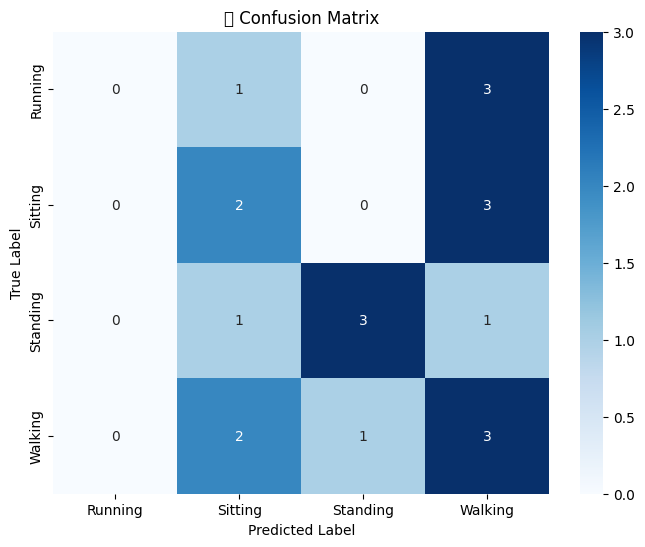

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


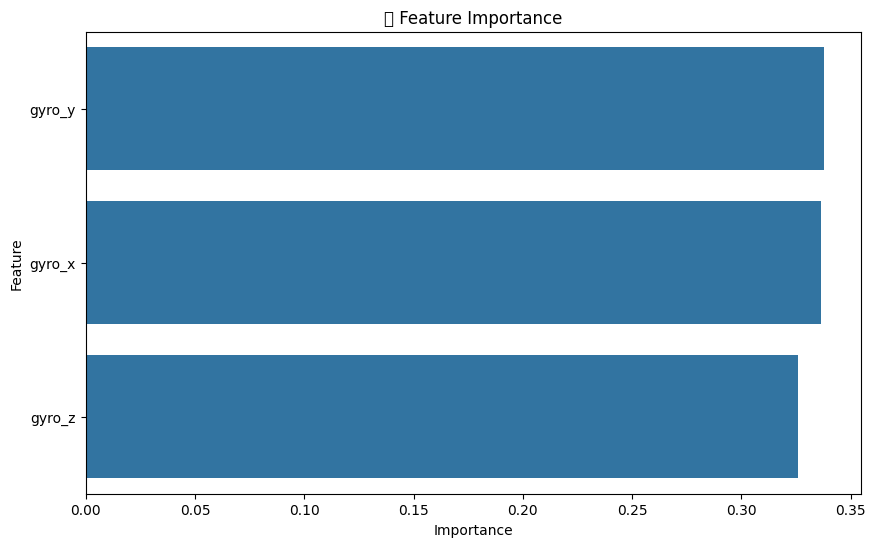

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns

print("Please upload your sensor data CSV file")
uploaded = files.upload()

# Get uploaded filename
for fn in uploaded.keys():
    filename = fn

# Load CSV
try:
    df = pd.read_csv(filename)
    print(f"\n✅ File '{filename}' uploaded and loaded successfully!")
    print(f"📐 Shape of dataset: {df.shape}")
except Exception as e:
    print(f"❌ Error loading file: {e}")
    raise SystemExit

# Find activity/label column
activity_column = None
for col in df.columns:
    if 'activity' in col.lower() or 'label' in col.lower():
        activity_column = col
        break

if activity_column is None:
    print("❌ Error: 'Activity' or similar column not found.")
    raise SystemExit

# Fill missing data
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

# Prepare features and labels
X = df.drop(activity_column, axis=1)
y = df[activity_column]

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ensure test set is large enough
num_classes = len(np.unique(y_encoded))
min_test_size = num_classes / len(df)
test_size = max(0.2, min_test_size)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=test_size, random_state=42, stratify=y_encoded
)

# Train classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"\n🎯 Accuracy: {accuracy * 100:.2f}%")
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("📊 Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Feature importance
feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("🔍 Feature Importance")
plt.show()
